# Logistic Regression


### Definición del problema


<br>

>El hundimiento del Titanic fue un hecho histórico que sudecio a inicios del siglo XX. Se trataba del mayor transatlantico construido hasta la fecha, el cual, al impactar con un Iceberg, termino hundiendose acabando con la vida de una gran parte de los pasajeros.

>En este sentido, nos han entregado un *dataset* que contiene **informacion acerca de los pasajeros** (sexo, edad, clase...) asi como informacion sobre su **superviviencia** (train). Aparte otro *dataset* contiene la misma informacion a excepcion de la supervivencia o no.


### Objetivo

    
>Crear un modelo que sea capaz de predecir la supervivencia o no a traves 
de las variables recogidas en el dataset.
        

### Estrategia 

>En este caso, estamos buscando predecir un suceso **categórico**, si x pasajeros 
**sobrevivirán (1) o no (0)**.


>Por lo que nuestro acercamiento se vera relacionado con modelos de 
clasificación. En la práctica veremos como tratar este tipo de modelos, así 
como, tratar otro tipo de variables diferentes a las usuales en un modelo 
de regresión. 

### BACKGROUND

#### ¿Que información sabemos apriori?

- El Titanic se hundió tras chocar con un iceberg. matando 1502 de 2224 pasajeros y tripulación. Tasa de supervivencia traducida del 32%.

- Una de las razones de tal pérdida de vidas fue que no hubo suficientes botes salvavidas para los pasajeros y la tripulación.

- A pesar de la suerte que supuso sobrevivir, algunos grupos de personas tuvieron mas fortuna que otros, como las mujeres, los niños y la clase alta.


## Etapas del Flujo de trabajo

### Las principales etapas de trabajo a realizar:

1. Definir el problema en cuestión.
2. Adquirir el set de datos de entrenamiento y de prueba (train & test).
3. Manipulación y transformación (Wrangling), preparación y limpieza de los datos.
4. Analizar identificar patrones y explorar el dato.
5. Construir el modelo.
6. Evaluar el modelo + Cross validation.
7. Visualizar, informar y presentar los pasos para la resolución del problema  y  la solución final.
8. Suministrar o enviar los resultados.

<br>

**Sin embargo, en muchos trabajos esta secuencia puede seguir otro orden.**

- **Combinar** varias etapas de trabajo:

        Ej:. Podemos analizar mediante la visualización de los datos.

- Realizar una **etapa previa** a lo indicado:

        Ej:. Podriamos (deberiamos) analizar el dato previo y despues de la 
        manipulacion y transformación de este. Nos permitira comprobar si 
        aquellos patrones que vimos se mantienen despues de la limpieza.

- Trabajar sobre una etapa de trabajo **varias veces** durante nuestro workflow:
    
        Ej:. La etapa de visualización puede ser usado multiples veces.
    
- **Eliminar** un paso completamente:
    
        Ej:. Podriamos no necesitar una etapa de suministro para producir o 
        habilitar el servicio de nuestro modelo (Lo entenderemos más adelante)
    

## Importamos nuestras librerias

In [107]:
# To handle the data
import pandas as pd
import numpy as np

# To make visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# To build the model
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Others
import warnings
warnings.filterwarnings("ignore")

# Matplotlib settings
plt.rcParams["figure.dpi"] = 100
# plt.style.use("default")


## Cargamos nuestro *dataset*

In [108]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
print(train.shape, test.shape)

(891, 12) (418, 11)


## Tipos de Variables
### Cualitativas


- Nominal:

     1. Survived: Binomial (Supervivencia (1) o no (0)).
     2. Sex: Binomial (Male & Female).
     3. Embarked: Multinomial de 3 niveles (S, C, Q).
        
        
- Ordinal: 
    
     1. Pclass: 3 niveles (1º, 2º y 3º).
         

### Cuantitativas

- Continuas:

    1. Age: Edad de los pasajeros.
    2. Fare: Tasa del ticket.


- Discretas:

    1. Parch: Nº Padres-Hijos a bordo.
    2. SibSp: Nº Hermanos-Esposos.

 
 ### Otras 
 
- Mezcladas:

    1. Cabin: Nº camarote (alphanumérico).
    2. Ticket: Both numerical and alphanumeric.
    
    
- Con erratas o errores:

    1. Name: Nombre de los pasajeros.
 


## Tipos de datos

### ¿Que tipo de objetos tengo? ¿Que tipo de objetos necesito?

OBJECTS:
- Name 
- Sex --> To numeric
- Ticket
- Cabin
- Embarked --> To numeric 

FLOATS:
- Age  --> to bins ?
- Fare --> to bins ?

INTEGERS:
- PassengerId
- Survived
- Pclass
- SibSp
- Parch




## Missing Values

### ¿Que variables contienen valores en blanco, nulos o vacios?


1. Train: cabina (687) > edad (177) > embarque (2) (de 891)
2. Test: cabina (327)> edad(86) > tasa (1) (de 418)                      


- Cabina tiene un ratio elevado de valores nulos (77% y 78%) tanto para train
como para test.
- Age cuenta con alrededor del 80% de valores no nulos tanto para train como
para test.
- Tanto Fare como Embarked muestran ratios muy pequeños de valores nulos 
(aprox. 0.02%).



### Importante!

Tambien podriamos combinar ambos (train y test) en un mismo dataset y ver los 
errores en general, sin embargo, creo que esto es más acertado, teniendo en 
cuenta que NO siempre vas a tener datasets con los mismos errores.



In [110]:
# Calculo del num. de missing values

print(train.isnull().sum())
print("-"*50)
print(test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [111]:
# Calculo del % de missing values

print("\nMissing Values %: \n\n", round(train.isnull().sum(
).sort_values(ascending=False) /len(train)*100, 2))

print("\nMissing Values %: \n\n", round(test.isnull().sum(
).sort_values(ascending=False) /len(test)*100, 2))



Missing Values %: 

 Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

Missing Values %: 

 Cabin          78.23
Age            20.57
Fare            0.24
Embarked        0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64


## Distribución de Variables Cuantitativas


Con respecto a la matriz de distribución, siempre es interesante conocer como funciona el rango intercuartílico, para ofrecer información estadística que no es tan sencilla de ver.

Más de **1.5 * IQR** significa que esas muestras estan fuera del **99.3% de la  distribución**. Por ende podemos afirmar que es un valor testimonial que refleja el comportamiento de unas pocas muestras.

- Tasa de tickets vario significativamente, muy pocos pasajeros pagaron precios **tan altos como 512$** (<1%)
- Pasajeros dentro del rango de **65-80 años** (<1%)


Con respecto a la media, también podemos ofrecer tambien valor estadístico

- Tasa de supervivencia del **38%**



Si se observa una muestra repetida tanto en el rango de 25 como el de 50 
sabemos que al menos la mitad de la distribución sigue ese valor.

- **Más del 50%** de los pasajeros correspondian a la 3clase.


Así como para aquellos valores que solo se encuentran en el 75% o solo en el primer 25% (SibSp or Parch):

- **Casi el 30%** de los pasajeros tenia esposas o hermanos a bordo.
- La mayoria de los pasajeros (**> 75%) NO** viajaba con padres o hijos


### Importante

Comenzamos con la funcion describe general, y sacamos las primeras conclusiones
basandonos en esos datos, despues aplicamos los percentiles para obtener una
información más precisa, si cabe.


In [112]:
# .1,.2,.3,.4,.6,.7,.8,.9


desc_cont = train.describe()
# desc_cont = train.describe(percentiles=[.1,.2,.3,.4,.6,.7,.8,.9,.99])

desc_cont.loc["+3_std"] = desc_cont.loc["mean"] + desc_cont.loc["std"]*3
desc_cont.loc["-3_std"] = desc_cont.loc["mean"] - desc_cont.loc["std"]*3



desc_cont

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
+3_std,1218.061526,1.843616,4.816856,73.278610,3.831238,2.799765,181.284494
-3_std,-326.061526,-1.075939,-0.199572,-13.880374,-2.785222,-2.036578,-116.876078


## Distribución de Variables Cualitativas

Para ello, mejor realizamos una segunda matriz de distribución.

- No hay ningun nombre que se repita a lo largo del dataset
- La variable sexo tenia 2 opciones: **Hombres (64.7%) y Mujeres (36.3%)**
- A pesar de la falta de datos podemos observar que Cabin tiene una **gran cantidad de duplicados**. En este sentido, muchos pasajeros compartieron camarote.
- Embarque tiene 3 posibilidades, el más comun de ellos fue el de **Southampton** (72%) con un total de 644 pasajeros que subieren en ese puerto.
- Muchos de los tickets tienen una alta proporción **(23%) de duplicados** (unique=681)


In [113]:
desc_cat = train.describe(include=["O"])
desc_cat.loc["%"] = (desc_cat.loc["freq"] / desc_cat.loc["count"])

desc_cat

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Aks, Mrs. Sam (Leah Rosen)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644
%,0.00112233,0.647587,0.00785634,0.0196078,0.724409


## REMOVE OUTLIERS


En este sentido, el gráfico de boxplot nos permite conocer los outliers 
incluidos algunos que no llegaremos a eliminar (No hay problema por ello).

> El IQR es el **rango intercuartilico** q3-q1 y saca los bigotes multiplicando este
rango por 1.5. Este rango recoge el **99.3% de los datos para una distribución
gaussiana**. Recoge la varianza con respecto a la mediana del +-2.698.

>Sin embargo, el **zscore** es un **metodo de normalizacón** que asigna un puntaje 
de distancia con respecto a la media. Con el zscore filtramos todos los datos
que superen tanto por arriba como por debajo el valor de **3 desviaciones 
estandar (+-3_std) (Recogiendo el 99.7% de los datos)**. 

>Como ves ambos metodos son **realmente similares** y ambos recogen alrededor del 
99% de las muestras para una distribución normal. Sin embargo, nos decantamos
por el zscore ya que este es **muy sencillo de implementar a traves de la
libreria scipy en apenas unas lineas de código**. Mientras que filtrar por el 
rango IQR es un proceso más tedioso.



In [114]:
# train.boxplot()

# Create a new dataframe
df_remove = train.copy()


# Remove non-numerical columns 
df_remove = df_remove.drop(["Name", "Sex", "Cabin", "Embarked", "Ticket", "PassengerId"], axis=1)


# Remove nan values
df_remove["Age"] = df_remove["Age"].replace(np.nan, 30)


df_remove = df_remove[(np.abs(zscore(df_remove))<3).all(axis=1)]
print(train.index.difference(df_remove.index))



Int64Index([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
            119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
            299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 480, 493, 527,
            541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686, 689,
            700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813, 824,
            846, 850, 851, 858, 863, 885],
           dtype='int64')


### Importante

No deberiamos hacer la eliminación de outliers hasta que no hayamos reemplazado
los **null-values**, seria despues del ***Data Wrangling*** para ver si algun dato se encuentra fuera de la distribucion y sobretodo si esta influyendo en el modelo.

Igualmente, podemos utilizar estadísticos a los que los valores fuera de la 
distribucion no les influyen demasiado como la mediana.

- Utilizaremos **zscore**, mucho mejor metodo

## ANALYZE BY PIVOTING FEATURES 

Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente nuestras correlaciones de características haciendo pivotar las características entre sí. Solo podemos hacerlo en esta etapa para las características que **NO tienen valores vacíos**. También tiene sentido hacerlo solo para características que son de tipo **categórico, ordinal o discreto**.

En este sentido, analizar variables:
1. Discretas: SibSp, Parch
2. Categoricas: Sex, Survived, Embarked
3. Ordinales: Pclass

### Conclusiones

- Hay una gran diferencia entre la supervivencia de hombres y mujeres, siendo estas últimas con una **mayor tendencia a sobrevivir (74%)** que los **hombres** que las acompañaban **(alrededor del 19%)**.

- Observamos tambien como existe una **relación positiva** a la supervivencia conforme vamos escalando en función de la clase del pasajero. Siendo los pasajeros de **3ª clase los mas damnificados** (24% ratio supervivencia) por aquellos que pertenecian a **la 1º clase (63%)**.

- También se observa **cambios en la supervivencia cuando estamos acompañados** por una o varias personas de nuestra familia:
    1. La supervivencia se incrementa de un 35% a alrededor de un **50-60%** para padres e hijos a bordo.
    2. Con respecto a hermanos y hermanas existe una tendencia similar de un 34% a entorno un **45-54%**.
    
Sin embargo, esta tendendia se disipa cuando seguimos aumentando en nº, esto
se debe en parte a que este tipo de casos fueron testimoniales y por ende
apenas hay datos que se puedan extrapolar con la gran cantidad de casos de 0, 1
o 2 acompañantes.

Quizás sería mas útil crear una **nueva columna que sea una combinación 
de estas 2** y que nos indique si la persona iba acompañada o no.


In [115]:
train[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [116]:
train[["Survived", "Sex"]].groupby("Sex", as_index= False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [117]:
train[["Survived", "Pclass"]].groupby("Pclass", as_index= False).mean()      

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [118]:
train[["Survived", "Parch"]].groupby("Parch", as_index= False).mean(
).sort_values(by="Survived", ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [119]:
print("Parch Values % \n\n", train["Parch"].value_counts()/len(train)*100)

Parch Values % 

 0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


In [120]:
train[["Survived", "SibSp"]].groupby("SibSp", as_index= False).mean(
).sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [121]:
print("SibSp Values % \n\n", train["SibSp"].value_counts()/len(train)*100)

SibSp Values % 

 0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


## ANALYSE BY VISUALIZING DATA

1. Variables Continuas 
2. Añadir una segunda variable
3. Observar interacciones entre variables



### AGE DISTRIBUTION (for each state) 

Yes, it's apparently normally or pseudo_normally distribuited

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.



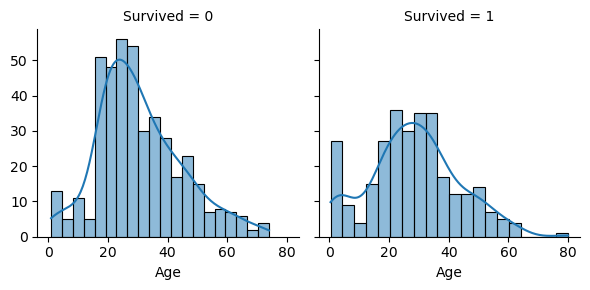

In [122]:
grid = sns.FacetGrid(data=train, col="Survived")
grid.map(sns.histplot, "Age", bins=20, kde=True)

### AGE in function to categorical variables which are most influenceable

- vs Pclass (it's useful to explain patterns but it's not too much necessary)
- vs Sex (not patterns)
- vs Emb (most cases are from S)


We have to use count by default and then if you want you can use density


**Observations.**

- Pclass=3 had most passengers, however most did not survive. 
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. 
- Most passengers in Pclass=1 survived. 
- Pclass varies in terms of Age distribution of passengers.

**Conclusion**

En este caso, ya que más que la edad, nos interesa categorizar los pasajeros en diferentes grupos de edad (niños, jovenes, adultos o ancianos). Ya que, como hemos visto se observan esto influyo en la supervivencia de los pasajeros.

Set in bins


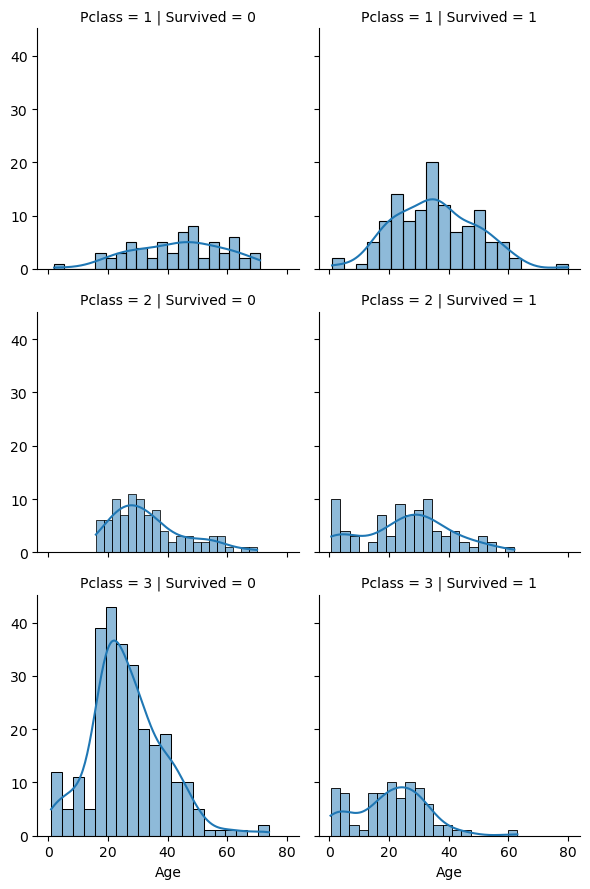

In [123]:
grid = sns.FacetGrid(train, col="Survived", row="Pclass")
# grid = sns.FacetGrid(train, col="Survived", row="Embarked")
# grid = sns.FacetGrid(train, col="Survived", row="Sex")

grid.map(sns.histplot, "Age", bins=20, kde=True)


### FARE DISTRIBUTION (for each state)

No normally distribuited


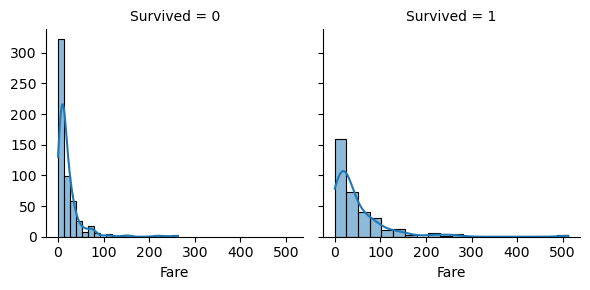

In [124]:
grid = sns.FacetGrid(train, col="Survived")
grid.map(sns.histplot, "Fare", bins=20, kde=True)


### Fare ¿Influye en la supervivencia? ¿Interacción con Sex or Embarked?

En el caso de Fare, nos interesa saber si realmente existe una diferencia significativa en la supervivencia de los pasajeros que pagaron más por su
ticket o no.


**Conclusión**

Tanto en Sex como en Embarked (excepto Queenstown) las personas que sobrevivieron de media presentaban una tasa mayor por su ticket que las que no. 

En este sentido, ya que no sigue una ND y existen valores muy dispersos, sería mejor categorizar la variable Fare

**Importante**

No podemos dibujarla respecto a Pclass por que son 2 características que  guardan un significado similar, aquellos que son de la 1º clase tendrán 
un mayor gasto en el ticket que los de la 2º o los de la 3º.



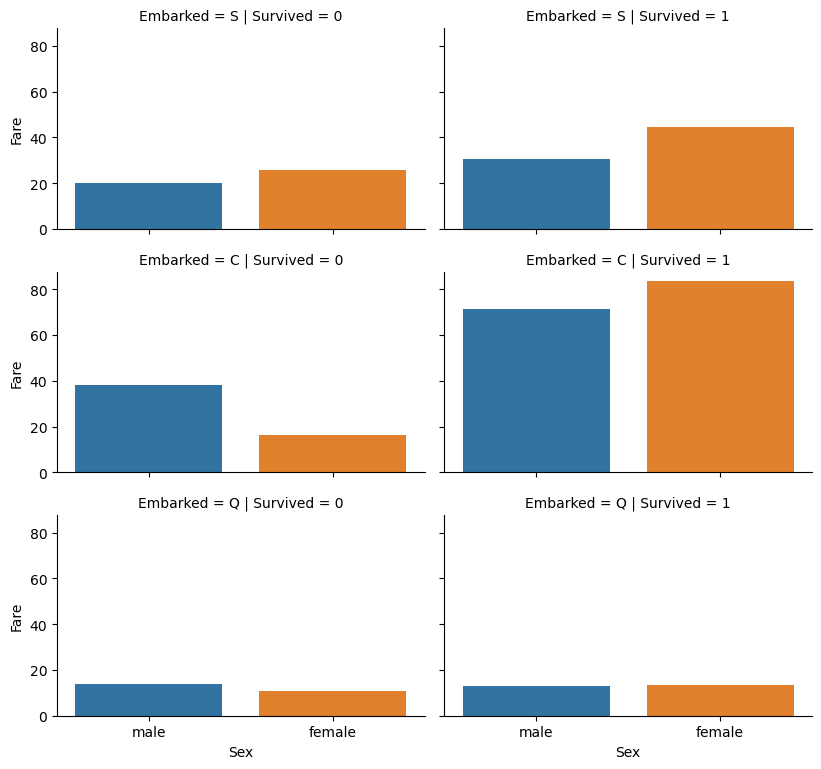

In [125]:
g = sns.catplot(data=train, x="Sex", y="Fare", col="Survived",ci=None,
                row="Embarked", kind="bar", height=2.6, aspect=1.6)
g.tight_layout()


### Interacciones entre variables (Pointplot)

Si queremos observar interacciones introduciremos varias variables a la ves, incluyendo la variable dependiente.

Para este tipo de graficas, es recomendable usar `catplot` en vez de `FacetGrid`

**Observaciones**

Se mantiene la tendencia de supervivencia de mujeres por encima de hombres en todos los puertos.


**¿QUE SIGNIFICA ESTO?

Que no hay interacción entre Embarked y Sex a la hora de cambios en la supervivencia, ni entre Embarked y Pclass




**INTERACCIÓN ENTRE 2 VARIABLES**

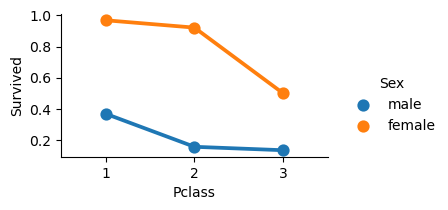

In [126]:
# fig = sns.catplot(data=train, x="Pclass", y="Survived", hue="Embarked", 
#                   kind="point", ci=None, saturation=0.4, height=2.2,
#                   aspect=1.6)

fig = sns.catplot(data=train, x="Pclass", y="Survived", hue="Sex", 
                  kind="point", ci=None, saturation=0.4, height=2.2,
                  aspect=1.6)

fig.tight_layout()

**Interacciones entre 3 variables**

No se observa interacciones.

Lo unico extraño es en el embarke de Queenstown donde la supervivencia de la 3º clase es superior a la de la 2º y la 1º.

Sin embargo, este embarque representa unicamente el 8% de los datos totales, por lo que no reflejaria el comportamiento general, sino mas bien, algo testimonial que no se puede extrapolar, ya que la tendendia se mantiene.


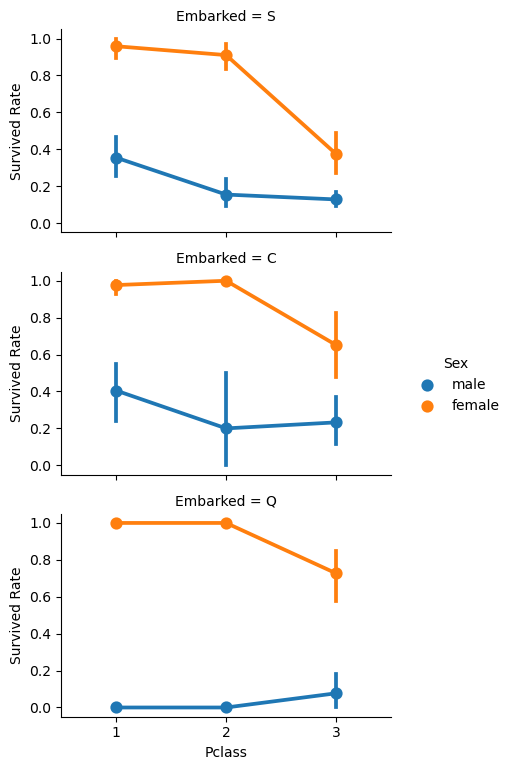

In [127]:
g = sns.catplot(data=train, x="Pclass", y="Survived", row="Embarked",
                hue="Sex", kind="point", height=2.6, aspect=1.6 )

g.set_axis_labels("Pclass", "Survived Rate")
g.tight_layout()



## DATA WRANGLING 

### Eliminar columnas innecesarias

In [128]:
train = train.drop(["Cabin", "Ticket"], axis=1)
test = test.drop(["Cabin", "Ticket"], axis=1)
combine = [train, test]


print(combine[0].shape, combine[1].shape)


(891, 10) (418, 9)


### Crear una nueva variable 'title'

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.


In [129]:
for dataset in combine:
    dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.", expand=False)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [130]:
pd.crosstab(train["Title"], train["Sex"])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Reemplazamos valores extraños por creando **la categoria Rare**

In [131]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Don', 'Rev', 'Dr',  'Major',
                                                 'Lady', 'Sir', 'Col', 'Capt',
                                                 'Countess', 'Jonkheer'], "Rare")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Master", "MaleChild")



In [132]:
train[["Survived", "Title"]].groupby("Title", as_index=False).mean(
).sort_values(by="Survived", ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,MaleChild,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [133]:
train[["Age", "Title"]].groupby("Title", as_index=False).mean(
).sort_values(by="Age", ascending=False)

,Title,Age
4,Rare,45.545455
3,Mrs,35.788991
2,Mr,32.368090
1,Miss,21.845638
0,MaleChild,4.574167


**Observaciones**

Podemos ver que para mujeres no existe un **titulo específico para hablar sobre las niñas (age < 14)**. Por lo que, resulta interesante observar la edad de aquellas chicas solteras **con padres a bordo** (posibles niñas) **o no** (mujeres jovenes pero solteras)

Se observa una gran diferencia entre chicas con o sin padres a bordo. Por lo que, sería interesante dividir la categoria de Miss y crear una nueva categoria a la que llamaremos **FemaleChild**.


In [134]:
print("MEDIA DE EDAD DE MISS: {:.0f}".format(train[(train["Title"] == "Miss")]["Age"].mean()))
print("MEDIA DE EDAD SIN PADRES A BORDO: {:.0f}".format(train[(train["Title"] == "Miss") & 
                                                              (train["Parch"] == 0)]["Age"].mean()))
print("MEDIA DE EDAD CON AL MENOS 1 PADRE: {:.0f}".format(train[(train["Title"] == "Miss") & 
                                                                (train["Parch"] != 0)]["Age"].mean()))




MEDIA DE EDAD DE MISS: 22
MEDIA DE EDAD SIN PADRES A BORDO: 28
MEDIA DE EDAD CON AL MENOS 1 PADRE: 12


In [135]:
for dataset in combine:
    dataset.loc[(dataset["Title"] == "Miss") & (dataset["Parch"] != 0), "Title"] = "FemaleChild"

train[train["Title"] == "FemaleChild"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,FemaleChild
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,21.0750,S,FemaleChild
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,41.5792,C,FemaleChild
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,27.7500,S,FemaleChild
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,7.9250,S,FemaleChild
...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,83.1583,C,FemaleChild
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,15.2458,C,FemaleChild
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,39.4000,S,FemaleChild
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S,FemaleChild


**Importante**

No podemos imputar la edad, tenemos que basarnos en otros factores, porque la edad es la variable con datos nulos y por tanto, no podemos imputar en base a una condicion que este sesgada por valores nulos.


In [136]:
train.groupby("Title", as_index=False)["Survived"].mean().sort_values(
    by="Survived", ascending=True)

,Title,Survived
3,Mr,0.156673
5,Rare,0.347826
1,MaleChild,0.575000
0,FemaleChild,0.625000
2,Miss,0.743802
4,Mrs,0.793651


**Mapear los títulos**

In [137]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].map({"Mr": 1,
                                              "Rare": 2,
                                              "MaleChild": 3,
                                              "FemaleChild": 4,
                                              "Miss": 5,
                                              "Mrs": 6})
    dataset["Title"] = dataset["Title"].fillna(0)
    dataset["Title"] = dataset["Title"].astype(int)
    


In [138]:
train.groupby("Title", as_index=False)["Age"].mean()      

,Title,Age
0,1,32.368090
1,2,45.545455
2,3,4.574167
3,4,11.863636
4,5,27.686170
5,6,35.788991


In [139]:
test.groupby("Title", as_index=False)["Age"].mean()      

,Title,Age
0,0,39.000000
1,1,32.000000
2,2,44.800000
3,3,7.406471
4,4,13.004286
5,5,26.058140
6,6,38.903226


### Completing a continuos feature

- La gente de la 1º Clase tiene más edad **(38)** a diferencia de la 2º y 3º clase **(25 y 29)**.
- Los hombres muestran las edades **más altas** (hasta 80), mientras que las mujeres **apenas superan los 60 años.**

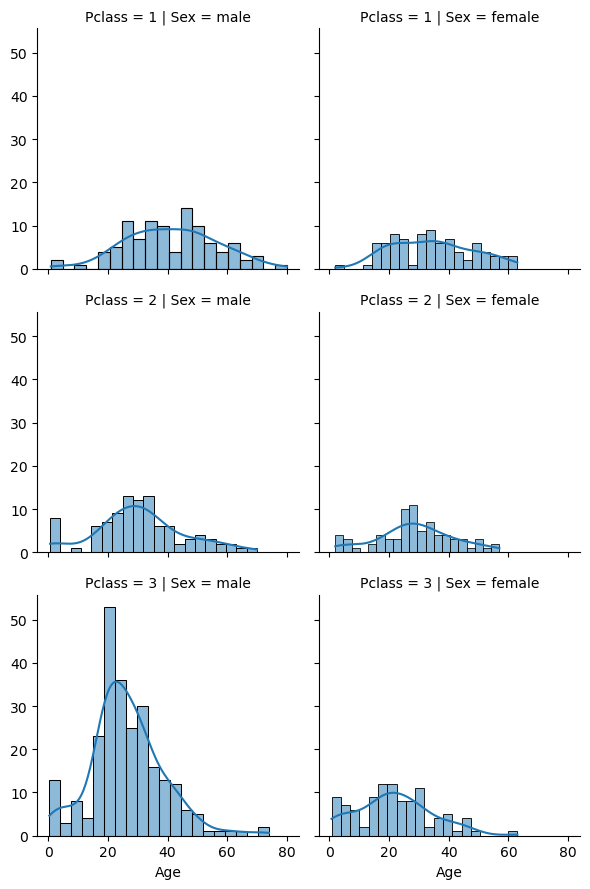

In [140]:
grid = sns.FacetGrid(data=train, col="Sex", row="Pclass")
grid.map(sns.histplot, "Age", bins=20, kde=True)



In [141]:
train.groupby("Pclass", as_index=False)["Age"].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [142]:
train.groupby("Title", as_index=False)["Age"].median()

,Title,Age
0,1,30.0
1,2,48.5
2,3,3.5
3,4,9.0
4,5,25.5
5,6,35.0


**Observaciones**

- Buen Acercamiento a traves de Title y Pclass
- Para ver la interaccion de ambos usaremos catplot
- Para medir la influencia de 2 variables independientes en la edad



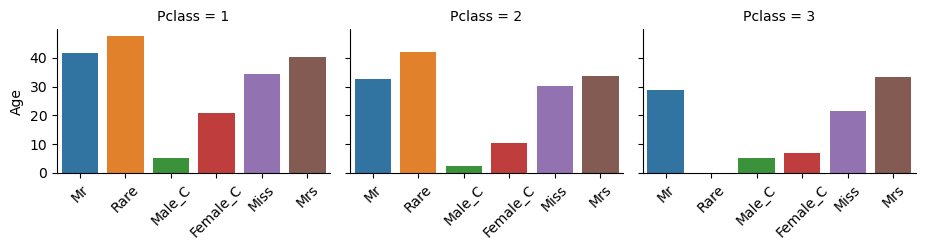

In [143]:
g = sns.catplot(data=train, x="Title", y="Age", col="Pclass", ci=None,
                kind="bar", height=2.6, aspect=1.2)

g.set_xticklabels(["Mr", "Rare", "Male_C", "Female_C", "Miss", "Mrs"], rotation=45)
g.set_axis_labels("", "Age")

g.tight_layout()


**Conclusiones**

- Tanto el titulo como la clase a la que pertenecen **influyen en la edad.**
- la 1º clase presenta **mayor edad** respecto a la 2º y3º

Por ello, vamos a realizar al imputación de valores de Age teniendo en cuenta **tanto Title como Pclass.**

### IMPUTAR VALORES DE AGE

Para rellenar valores nulos de Age, utilizaremos otras variables de las cuales sacaremos los valores de edad media.


**Importante**

Utilizar la funcion `as_index=False` para crear un **DataFrame con cada una de las columnas (Title y Pclass).**

De lo contrario, generara una serie con un **índice compuesto**, en la que **NO** podremos hacer imputación a traves del indice




In [144]:
# Use transform to guess the value (not as good method)
# # age_guess = train.groupby(["Pclass","Sex","Title"])["Age"].transform("mean")

grp = train.groupby(["Pclass", "Title"], as_index=False)["Age"].mean()
print(type(grp))

grp

<class 'pandas.core.frame.DataFrame'>


,Pclass,Title,Age
0,1,1,41.580460
1,1,2,47.571429
2,1,3,5.306667
3,1,4,21.000000
4,1,5,34.258065
5,1,6,40.400000
6,2,1,32.768293
7,2,2,42.000000
8,2,3,2.258889
9,2,4,10.538462


**Importante**

Cuando llamemos al dato, queremos **únicamente el dato** no los valores del indice, nombre de col y datatype.

Para pedir el dato, usaremos la función `.values[0]`


In [145]:
print("Caso 1:\n\n", grp[(grp.Pclass==2) & (grp.Title==3)]['Age'])

print("\nCaso 2:\n\n {:.0f}".format(grp[(grp.Pclass==2) & 
                                        (grp.Title==3)]['Age'].values[0]))



Caso 1:

 8    2.258889
Name: Age, dtype: float64

Caso 2:

 2


**Creamos una función lamba para rellenar los datos de Age**


In [146]:
def fill_age(x):
    return grp[(grp.Pclass == x.Pclass) & (grp.Title == x.Title)]["Age"].values[0]

display(train.loc[5, ["Pclass", "Title"]])

print("Edad Predicha: {:.0f} años".format(fill_age(train.loc[5])))

Pclass    3
Title     1
Name: 5, dtype: object

Edad Predicha: 29 años


**Realizar este proceso para el conjunto de datos**

In [147]:
print("Data Before:\n\n", combine[0].isnull().sum(), combine[1].isnull().sum())

for dataset in combine:
    dataset["Age"] = dataset.apply(lambda x: fill_age(x) if np.isnan(x["Age"])
                            else x["Age"], axis=1)
    dataset["Age"] = dataset["Age"].astype(int)


print("\n\nData After:\n\n", combine[0].isnull().sum(), combine[1].isnull().sum())


Data Before:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64 PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64


Data After:

 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64


### Converting Age into a categorical column

In [148]:
train["AgeBand"] = pd.cut(train["Age"], 5)
# display(train["AgeBand"].value_counts())


for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C,6,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,7.9250,S,5,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,53.1000,S,6,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [149]:
train.groupby("Age", as_index=False)["Survived"].mean().sort_values(by="Survived", ascending=False)

,Age,Survived
0,0,0.513274
3,3,0.434783
2,2,0.422222
1,1,0.334038
4,4,0.090909


### Eliminar columnas no relevantes

In [150]:
train = train.drop(["AgeBand", "Name", "PassengerId"], axis=1)
test = test.drop("Name", axis=1)
combine = [train, test]

combine[0].shape, combine[1].shape

((891, 9), (418, 9))

### Convertir una variable categórica en numérica

In [151]:
print(train["Sex"].unique())

for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female": 1,
                                         "male": 0})
    dataset["Sex"] = dataset["Sex"].astype(int)


['male' 'female']


In [152]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,6
2,1,3,1,1,0,0,7.9250,S,5
3,1,1,1,2,1,0,53.1000,S,6
4,0,3,0,2,0,0,8.0500,S,1


### Crear una nueva variable: FamilySize 

**Observaciones**

- El grupo mayoritario ( > 60%) viajaba sin **ningun tipo de acompañante.**
- Se observa una **mayor supervivencia** de los grupos con **1 o 2 acompañantes** en ambos casos (Parch y SibSp).
- A partir de los 3 acompañantes, se **reduce** la tasa de supervivencia drasticamente, sin embargo, estos grupos son           testimoniales y **apenas representan el 5%** de la distribución


In [153]:
print(train["Parch"].value_counts()/len(train)*100)

train[["Survived", "Parch"]].groupby("Parch", as_index= False).mean().sort_values(by="Survived", ascending=False)


0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [154]:
print(train["SibSp"].value_counts()/len(train)*100)

train[["Survived", "SibSp"]].groupby("SibSp", as_index= False).mean().sort_values(by="Survived", ascending=False)


0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Conclusiones**

Vemos que el nº de acompañantes influye en la supervivencia. Sin embargo, existen ciertos grupos que **no nos aportan información clara** y su numero de casos es testimonial. Por lo tanto, sería interesante realizar una **nueva variable** que indique si el sujeto en cuestión se encontraba **solo o acompañado** durante el naufragio.




In [155]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"]
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1,1
1,1,1,1,2,1,0,71.2833,C,6,1
2,1,3,1,1,0,0,7.9250,S,5,0
3,1,1,1,2,1,0,53.1000,S,6,1
4,0,3,0,2,0,0,8.0500,S,1,0


In [156]:
train[["FamilySize", "Survived"]].groupby("FamilySize", as_index=False).mean(
    ).sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


### Creamos una nueva columna: IsAlone

Observamos si se cumple que hay una diferencia significativa entre estar acompañado
o no, durante el naufragio.

- La tasa de supervivencia, es un **20% mayor** si se **estuvo acompañado** durante el naufragio.



In [157]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[ dataset["FamilySize"] == 0, "IsAlone"] = 1
    
train.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,1,0
1,1,1,1,2,1,0,71.2833,C,6,1,0
2,1,3,1,1,0,0,7.9250,S,5,0,1
3,1,1,1,2,1,0,53.1000,S,6,1,0
4,0,3,0,2,0,0,8.0500,S,1,0,1


In [158]:
train[["IsAlone", "Survived"]].groupby("IsAlone", as_index=False).mean().sort_values(by="Survived", ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Podemos eliminar columnas innecesarias

In [159]:
train = train.drop(["SibSp", "Parch", "FamilySize"], axis=1)
test = test.drop(["SibSp", "Parch", "FamilySize"], axis=1)
combine = [train, test]

train.shape, test.shape

((891, 8), (418, 8))

### Reemplazar valores nulos en Embarked

En este caso, vamos a reemplazar los valores nulos por el valor **más frecuente**.

- El 72% de los pasajeros a bordo embarcaron desde Southampton.




In [160]:
print(train["Embarked"].value_counts()/len(train)*100)

train["Embarked"].isnull().sum(), test["Embarked"].isnull().sum()

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


(2, 0)

In [161]:
for dataset in combine:
    # dataset["Embarked"] = dataset["Embarked"].fillna("S")
    dataset["Embarked"] = dataset["Embarked"].replace(np.nan, "S")

train["Embarked"].isnull().sum(), test["Embarked"].isnull().sum()

(0, 0)

In [162]:
print(combine[0].isnull().sum(), combine[1].isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64 PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
dtype: int64


### Convertir una columna categórica en numérica

En este caso, vamos a reemplazarlos por numeros tomando como control, el embarque con la menor supervivencia, Southampton, y continuando en orden ascendente hasta Cherbourg.

- C = Cherbourg
- Q = Queenstown
- S = Southampton


In [163]:
train[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean().sort_values(by="Survived", ascending=False)      

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [164]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "Q":1, "C":2})
    dataset["Embarked"] = dataset["Embarked"].astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,2,6,0
2,1,3,1,1,7.9250,0,5,1
3,1,1,1,2,53.1000,0,6,0
4,0,3,0,2,8.0500,0,1,1


### Completar la columna Fare

In [165]:
# print(dataset.Fare.mean(), dataset.Fare.median())

for dataset in combine:
    dataset["Fare"] = dataset["Fare"].replace(np.nan, 14.45)

print(combine[0].isnull().sum(), combine[1].isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64 PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
dtype: int64


### Creamos una nueva variable: FareBand

Sabemos que fare no sigue una distribución normal (Etapa visualización) dado que aquellos, que pertenecian a la primera clase podian pagar tasas muy dispares, incluso existia gente con titulos nobiliarios o reales.

- **Más del 50%** pertenecia a la 3º clase.
- La mediana de precio del ticket **ronda los 14 dólares**.
- **Notables diferencias** en la media entre la 1º (84) y el resto de clases (20 y 13 dólares). 


**Conclusiones**

Vamos a categorizar esta variable teniendo en cuenta, que **no sigue una distribución normal** y por tanto, los cortes los vamos a realizar teniendo en cuenta los cuartiles e intentando **equilibrar las muestras** para cada una de nuestras categorias.




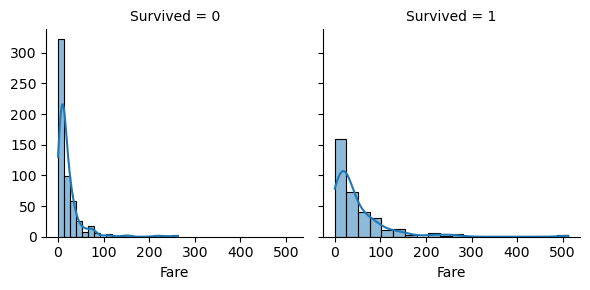

In [166]:
grid = sns.FacetGrid(train, col="Survived")
grid.map(sns.histplot, "Fare", bins=20, kde=True)

In [167]:
print(train[["Fare", "Pclass"]].groupby("Pclass", as_index=False).mean())

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


In [168]:
train["FareBand"] = pd.qcut(train["Fare"], 4)

train["FareBand"].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: FareBand, dtype: int64

In [169]:
train.groupby("FareBand", as_index=False)["Survived"].mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


### Sustituimos los valores de la columna Age para cada una de las categorias de FareBand

In [172]:
# for dataset in combine:
#     dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
#     dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
#     dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31.0), "Fare"] = 2
#     dataset.loc[dataset["Fare"] > 31.0, "Fare"] = 3
#     dataset["Fare"] = dataset["Fare"].astype(int)
    
train["Fare"].value_counts()

2    229
0    223
3    222
1    217
Name: Fare, dtype: int64

### Procedemos a eliminar columnas innecesarias

In [ ]:
train = train.drop("FareBand", axis=1)
combine = [train, test]

In [180]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,2,6,0
2,1,3,1,1,1,0,5,1
3,1,1,1,2,3,0,6,0
4,0,3,0,2,1,0,1,1


In [177]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,1,1,1
1,893,3,1,2,0,0,6,0
2,894,2,0,3,1,1,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,6,0


## Modelo de Regresión Logística

In [178]:
# Create X and Y variables


X_train = train.drop("Survived", axis=1)
y_train = train[["Survived"]]

X_test = test.drop("PassengerId", axis=1)


X_train.shape, X_test.shape, y_train.shape

((891, 7), (418, 7), (891, 1))

In [182]:
# Build the Logit Model

logreg = LogisticRegression()

logreg.fit(X_train, y_train)


LogisticRegression()

In [183]:
# Make a prediction

y_pred = logreg.predict(X_test)


In [185]:
# Accuracy

acc_log = logreg.score(X_train, y_train) *100

print("Accuracy: {:.2f}% ".format(acc_log))


Accuracy: 81.37% 


In [186]:
# Coefficients

coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Title,0.732743
4,Embarked,0.294091
6,IsAlone,0.260202
3,Fare,-0.082824
1,Sex,-0.111968
2,Age,-0.580275
0,Pclass,-1.307545
